Analyse the manual mapping of DDC subjects to OpenAlex fields. We have manually assigned DDC subclasses to the fields, and then extracted the documents indexed with each subclass (and its descendants) through the files `relevant_subjects_reversed.json`, stored under each repository name in `data/json/dim`.

In [2]:
import json
from collections import Counter
from matplotlib import pyplot as plt

In [3]:
ddc = json.load(open('../data/openalex/ddc_docs.json'))
len(ddc)  # no. of fields

19

In [4]:
lengths = []  # [len(v['docs']) for v in ddc.values()]
for subject in ddc:
  lengths += [len(docs) for docs in ddc[subject].values()]
sum(lengths) / len(lengths)  # avg. no. of documents per subject

129.4632768361582

In [5]:
sum(lengths)  # total number of assignments

22915

In [6]:
sorted_lengths = sorted(lengths, reverse=True)
top = sorted_lengths[:5]  # no. of docs of the five subjects with the most docs
for subject in ddc:
  for number in ddc[subject]:
    if len(ddc[subject][number]) in top:
      print(subject, number, len(ddc[subject][number]))

Medicine 610 3611
Biology 570 2089
Physics 530 2634
Mathematics 510 1285
Economics 330 2299


In [7]:
cnt = Counter(lengths)
print(cnt.most_common(5))  # most common no. of documents per subject

[(1, 32), (2, 22), (5, 12), (6, 6), (4, 6)]


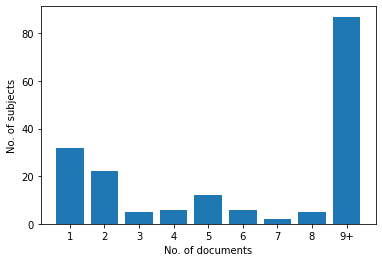

In [8]:
x = [str(i) for i in range(1, 10)]
x[-1] += '+'
y = [cnt[i] for i in range(1, 9)] + [sum(cnt[i] for i in cnt if i >= 9)]
plt.bar(range(1, 10), y)
plt.xlabel('No. of documents')
plt.ylabel('No. of subjects')
plt.xticks(range(1, 10), x)
plt.show()

In [9]:
y

[32, 22, 5, 6, 12, 6, 2, 5, 87]

In [10]:
sum(y)  # number of distinct DDC subjects

177

In [11]:
field_totals = {}
for field in ddc:
  field_totals[field] = 0
  for number in ddc[field]:
    field_totals[field] += len(ddc[field][number])

In [12]:
field_distinct = {}
for field in ddc:
  field_distinct[field] = set()
  for number in ddc[field]:
    field_distinct[field].update(ddc[field][number])

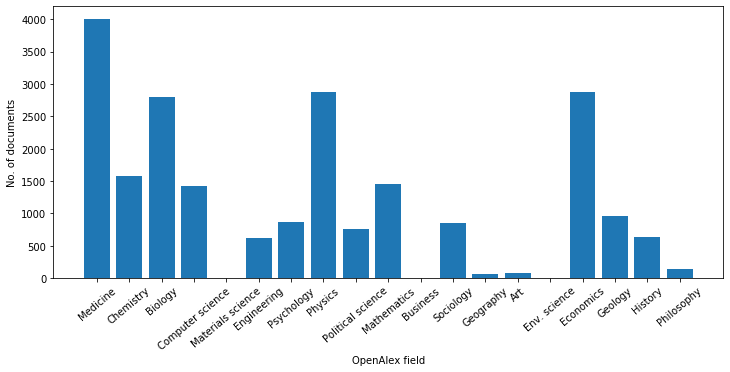

In [13]:
x = list(field_distinct.keys())
y = [len(v) for v in field_distinct.values()]
x[x.index('Environmental science')] = 'Env. science'
plt.figure(figsize=(12,5))
plt.bar(range(len(field_distinct)), y)
plt.xticks(range(len(field_distinct)), x, rotation=40)
plt.xlabel('OpenAlex field')
plt.ylabel('No. of documents')
plt.show()

In [14]:
distinct_counts = dict(zip(list(field_distinct.keys()), y))
distinct_counts

{'Medicine': 3998,
 'Chemistry': 1577,
 'Biology': 2802,
 'Computer science': 1422,
 'Materials science': 0,
 'Engineering': 614,
 'Psychology': 862,
 'Physics': 2874,
 'Political science': 754,
 'Mathematics': 1453,
 'Business': 0,
 'Sociology': 855,
 'Geography': 61,
 'Art': 83,
 'Environmental science': 0,
 'Economics': 2874,
 'Geology': 954,
 'History': 641,
 'Philosophy': 144}

In [15]:
sum(distinct_counts.values())  # total no. of documents in this dataset

21968

In [16]:
sum(field_totals.values())  # total no. of assignments in this dataset

22915

In [17]:
for field in field_totals:
  print(f'{field}: {field_totals[field] - len(field_distinct[field])} duplicates')

Medicine: 90 duplicates
Chemistry: 49 duplicates
Biology: 133 duplicates
Computer science: 45 duplicates
Materials science: 0 duplicates
Engineering: 2 duplicates
Psychology: 71 duplicates
Physics: 54 duplicates
Political science: 66 duplicates
Mathematics: 100 duplicates
Business: 0 duplicates
Sociology: 42 duplicates
Geography: 2 duplicates
Art: 35 duplicates
Environmental science: 0 duplicates
Economics: 155 duplicates
Geology: 47 duplicates
History: 54 duplicates
Philosophy: 2 duplicates


In [18]:
avg = lambda terms: round(sum([len(v) for v in terms.values()]) / len(terms), 2)
subclasses, more_specific = {}, {}
distinct_terms = set()
for field in ddc:
  for term, values in ddc[field].items():
      distinct_terms.add(term)
      if term[-1:] == '0':
          subclasses[term] = values
      else:
          more_specific[term] = values
print(f'Out of the {len(distinct_terms)} distinct DDC terms:')
print(f'\t{len(subclasses)} are subclasses, i.e the number ends in 0. These terms a to {avg(subclasses)} documents on avg.')
print(f'\t{len(more_specific)} are more specific than that. These terms are assigned to {avg(more_specific)} documents on avg.')

Out of the 177 distinct DDC terms:
	28 are subclasses, i.e the number ends in 0. These terms a to 622.5 documents on avg.
	149 are more specific than that. These terms are assigned to 36.81 documents on avg.


In [19]:
list(subclasses.keys())[:5], list(more_specific.keys())[:5]

(['610', '540', '570', '000', '620'], ['614', '615', '612', '616', '618'])

How are the DDC subjects distributed among the fields?

In [20]:
ddc_fields = {}
for field in ddc:
  ddc_fields[field] = len(ddc[field])
ddc_fields

{'Medicine': 10,
 'Chemistry': 8,
 'Biology': 9,
 'Computer science': 7,
 'Materials science': 0,
 'Engineering': 8,
 'Psychology': 7,
 'Physics': 9,
 'Political science': 9,
 'Mathematics': 9,
 'Business': 0,
 'Sociology': 8,
 'Geography': 7,
 'Art': 6,
 'Environmental science': 0,
 'Economics': 11,
 'Geology': 10,
 'History': 41,
 'Philosophy': 18}

How many documents are there and how many DDC subjects do they have on average?

In [21]:
docs = {}
for subject in ddc:
  for number in ddc[subject]:
    for doc in ddc[subject][number]:
      if doc in docs:
        docs[doc].append(subject)
      else:
        docs[doc] = [subject]
len(docs)  # no. of documents

20636

In [22]:
doc_cnt = Counter([len(v) for v in docs.values()])
doc_cnt.most_common(5)  # 5 most common number of subjects per document

[(1, 18865), (2, 1398), (3, 277), (4, 59), (5, 35)]

In [23]:
sum([k*v for k,v in doc_cnt.items()]) / sum(doc_cnt.values())  # avg. number of DDC subjects per document

1.1104380693932934

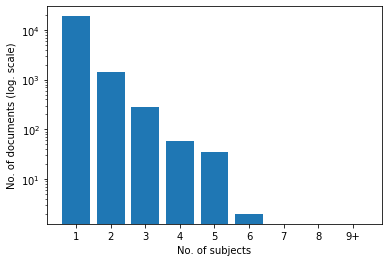

In [24]:
x = [str(i) for i in range(1, 10)]
x[-1] += '+'
y = [doc_cnt[i] for i in range(1, 9)] + [sum(doc_cnt[i] for i in doc_cnt if i >= 9)]
plt.bar(range(1, 10), y)
plt.xlabel('No. of subjects')
plt.ylabel('No. of documents (log. scale)')
plt.yscale('log')
plt.xticks(range(1, 10), x)
plt.show()

In [25]:
y  # values of the plot above

[18865, 1398, 277, 59, 35, 2, 0, 0, 0]

What is the distribution of the involved documents across repositories?

In [26]:
repo_cnt = {'depositonce': 0, 'edoc': 0, 'refubium': 0}
for doc in docs:
  for repo in repo_cnt:
    if repo in doc:
      repo_cnt[repo] += 1
      break
repo_cnt

{'depositonce': 2333, 'edoc': 5837, 'refubium': 12466}

In [27]:
repo_totals = {'depositonce': 7438, 'edoc': 7497, 'refubium': 14464}  # total no. of docs
for repo in repo_totals:
  print(repo, repo_cnt[repo]/repo_totals[repo])

depositonce 0.3136595859101909
edoc 0.778578097905829
refubium 0.8618639380530974


In [28]:
sum(repo_cnt.values()), sum(repo_cnt.values()) / sum(repo_totals.values())

(20636, 0.7019286370284703)